### Business Analytics Project

Evaluate marketing expenses

##### You have:
- Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
- Dump file with all orders for the period
- Marketing expenses statistics

##### You are going to study:
- How people use the product
- When they start to buy
- How much money each customer brings
- When they pay off

In [1]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
visits = pd.read_csv("visits_log_us.csv", dtype={'Device': 'category'}, parse_dates=['End Ts', 'Start Ts'])
orders = pd.read_csv("orders_log_us.csv", parse_dates=['Buy Ts'])
costs = pd.read_csv("costs_us.csv", parse_dates=['dt'])

display(visits.head(10))
display(orders.head(10))
display(costs.head(10))

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [3]:
#study the data they contain make sure the data types are correct.
visits.info()
orders.info()
costs.info()

visits.isnull().sum()
orders.isnull().sum()
costs.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 

source_id    0
dt           0
costs        0
dtype: int64

In [4]:
visits.duplicated().sum()

0

In [5]:
visits.drop_duplicates(inplace=True)
display(visits)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [6]:
orders.duplicated().sum()

0

In [7]:
orders.drop_duplicates(inplace=True)
display(orders)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [8]:
costs.duplicated().sum()

0

In [9]:
costs.drop_duplicates(inplace=True)
display(costs)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


##### Conclusion

Start end ts will need to be converted to date time in visits dataframe

Date time (dt) needs to be converted in expenses dataframe because an object is not going to be helpful in this case. 

Buy Ts will need to be converted in the orders dataframe

No null values so thats good

#### Step 2. Make reports and calculate metrics:
Plot graphs to display how these metrics differ for various devices and ad sources and how they change in time.

#### Product
- How many people use it every day, week, and month?
- How many sessions are there per day? (One user might have more than one session.)
- What is the length of each session?
- How often do users come back?

In [11]:
#number of people who use it daily, weekly, monthly and yearly
visits['session_date'] = visits['Start Ts'].dt.date
visits['session_year']  = visits['Start Ts'].dt.year
visits['session_month'] = visits['Start Ts'].dt.month
visits['session_week']  = visits['Start Ts'].dt.week
visits['start_day'] = visits['Start Ts'].dt.day
display(visits.head())

,Device,End Ts,Source Id,Start Ts,Uid,session_date,session_year,session_month,session_week,start_day
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017,12,51,20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018,2,8,19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017,7,26,1
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018,5,20,20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017,12,52,27


In [12]:
dau_total = visits.groupby('session_date').agg({'Uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).mean()

print('Users per Day', int(dau_total))
print('Users per Week', int(wau_total))
print('Users per Month',int(mau_total))

Users per Day 907
Users per Week 5716
Users per Month 23228


In [13]:
daily_sessions_total = visits.groupby('session_date').agg({'Uid':'count'}).mean()
print('Average sessions daily:', int(daily_sessions_total))

Average sessions daily: 987


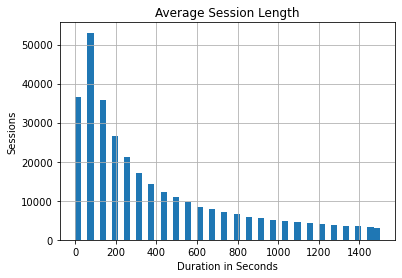

Average Session Length is: 0    60
dtype: int64
60     0.147549
0      0.099594
120    0.099466
180    0.074213
240    0.058667
300    0.047315
360    0.039833
420    0.034226
480    0.030531
540    0.027051
Name: session_duration_sec, dtype: float64


In [14]:
#Average Session Length ASL
visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
visits['session_duration_sec'].hist(bins=50, range=(0, 1500))
plt.title("Average Session Length")
plt.ylabel("Sessions")
plt.xlabel("Duration in Seconds")
plt.show()

print("Average Session Length is:", visits['session_duration_sec'].mode()) 
print(visits['session_duration_sec'].value_counts(normalize=True).head(10))

#### conclusion
on average each user spend about 80 sessions engaging in the products on the site

In [16]:
#vanity metrics on how often users come back
sticky_wau = dau_total/wau_total *100
print('Users who return(Weekly)', int(sticky_wau))
sticky_mau = dau_total/mau_total * 100
print('Users who return(Monthly)', int(sticky_mau))

Users who return(Weekly) 15
Users who return(Monthly) 3


#### Conclusions
Average session length of 60 seconds(1 minute) indicates the amount of time each visit is to the site. The next longest visit time of only about 10% which might represent abandoned attempts to find product. According to the weekly and monthly sticky factors, only 16% and 4% of users, respectively, return to use the product. The product doesn't demand much user loyalty.

In [17]:
#user retention visit lifetime
first_visit_date = visits.groupby('Uid')['session_date'].min()
first_visit_date.name = 'first_visit_date'
visits = visits.merge(first_visit_date, on='Uid')

In [18]:
visits['first_visit_month']= visits['first_visit_date'].astype('datetime64[M]')
visits['visit_month']= visits['session_date'].astype('datetime64[M]')

In [19]:
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month']

visits['cohort_lifetime'] = visits['cohort_lifetime']/np.timedelta64(1, 'M')

visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

In [20]:
cohorts= visits.groupby(['first_visit_month','cohort_lifetime']).agg({'Uid':'nunique'}).reset_index()

initial_user_count = cohorts[cohorts['cohort_lifetime']==0][['first_visit_month','Uid']]
initial_user_count = initial_user_count.rename(columns={'Uid':'cohort_users'})
cohorts= cohorts.merge(initial_user_count, on='first_visit_month')
cohorts['retention']= cohorts['Uid']/cohorts['cohort_users']

In [21]:
#creating pivot for retention rate
cohorts['months']=cohorts['first_visit_month'].dt.strftime('%Y-%m')
retention_pivot =cohorts.pivot_table(index='months', columns='cohort_lifetime', values='retention', aggfunc='sum')
retention_pivot.mean(axis=0)

cohort_lifetime
0     1.000000
1     0.065167
2     0.046333
3     0.042760
4     0.040595
5     0.039444
6     0.036957
7     0.037509
8     0.035465
9     0.035159
10    0.034062
11    0.044951
dtype: float64

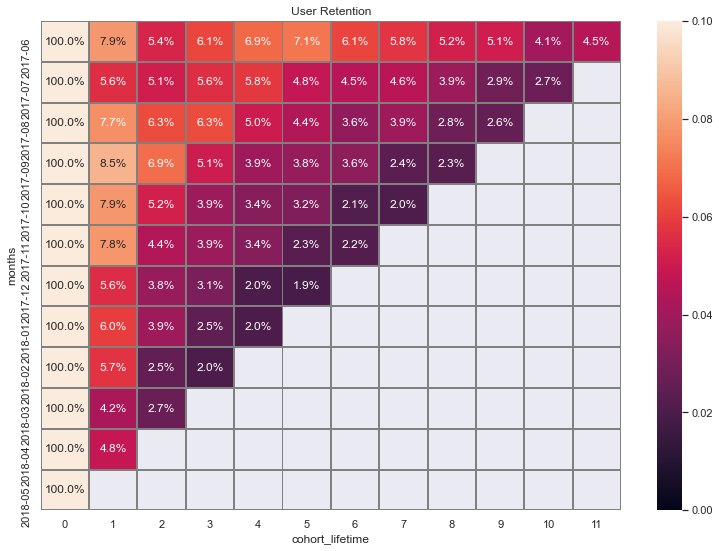

In [22]:
#creating heatmap for retention rate
sns.set(style='dark')
plt.figure(figsize=(13,9))
plt.title('User Retention')
sns.heatmap(retention_pivot, annot=True, fmt= '.1%', linewidth= 1, linecolor='gray', vmax= 0.1, vmin=0)

##### Conclusion
users come back between 4.2% and 8.5% on their first visits. on the 11th visit they were coming back between 4.5% of the time.These numbers cannot be negative. These percentages privide information on the likelihood a customer is going to come back for a purchase. This can help motivate the team so that they know where to increase efforts that lead to purchases. Overall there is a decrease over lifetime cycles and the data shows the first cohort showed some positive increases in retention rates but then dropped after just 4 months

#### Sales
- When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)
- How many orders do they make during a given period of time?
- What is the average purchase size?
- How much money do they bring? (LTV)

In [27]:
#merging orders to visits dataframe
visits_orders = orders.merge(visits, on='Uid', how = 'left')
display(visits_orders.sort_values(by='Uid').head())
print(len(visits_orders))

,Buy Ts,Revenue,Uid,Device,End Ts,Source Id,Start Ts,session_date,session_year,session_month,session_week,start_day,session_duration_sec,first_visit_date,first_visit_month,visit_month,cohort_lifetime
409294,2018-01-03 21:51:00,0.55,313578113262317,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-11,2018,3,10,11,360,2017-09-18,2017-09-01,2018-03-01,6
409295,2018-01-03 21:51:00,0.55,313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017,9,38,18,1080,2017-09-18,2017-09-01,2017-09-01,0
409296,2018-01-03 21:51:00,0.55,313578113262317,desktop,2018-02-18 15:26:00,2,2018-02-18 15:17:00,2018-02-18,2018,2,7,18,540,2017-09-18,2017-09-01,2018-02-01,5
2823,2017-06-03 17:39:00,1.83,1575281904278712,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,2017-06-03,2017,6,22,3,240,2017-06-03,2017-06-01,2017-06-01,0
2824,2017-06-03 17:39:00,1.83,1575281904278712,touch,2017-06-03 17:48:00,10,2017-06-03 17:36:00,2017-06-03,2017,6,22,3,720,2017-06-03,2017-06-01,2017-06-01,0


761807


In [28]:
#first orders dates
first_orders = visits_orders.groupby('Uid')['Buy Ts'].min()
first_orders.name = 'first_order Ts'
visits_orders = visits_orders.merge(first_orders, on='Uid')
display(visits_orders.sort_values(by='Uid').head())
print(len(visits_orders))

,Buy Ts,Revenue,Uid,Device,End Ts,Source Id,Start Ts,session_date,session_year,session_month,session_week,start_day,session_duration_sec,first_visit_date,first_visit_month,visit_month,cohort_lifetime,first_order Ts
646966,2018-01-03 21:51:00,0.55,313578113262317,desktop,2018-02-18 15:26:00,2,2018-02-18 15:17:00,2018-02-18,2018,2,7,18,540,2017-09-18,2017-09-01,2018-02-01,5,2018-01-03 21:51:00
646965,2018-01-03 21:51:00,0.55,313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017,9,38,18,1080,2017-09-18,2017-09-01,2017-09-01,0,2018-01-03 21:51:00
646964,2018-01-03 21:51:00,0.55,313578113262317,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-11,2018,3,10,11,360,2017-09-18,2017-09-01,2018-03-01,6,2018-01-03 21:51:00
87229,2017-06-03 10:13:00,1.22,1575281904278712,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,2017-06-03,2017,6,22,3,240,2017-06-03,2017-06-01,2017-06-01,0,2017-06-03 10:13:00
87230,2017-06-03 10:13:00,1.22,1575281904278712,touch,2017-06-03 17:48:00,10,2017-06-03 17:36:00,2017-06-03,2017,6,22,3,720,2017-06-03,2017-06-01,2017-06-01,0,2017-06-03 10:13:00


761807


In [29]:
#creating column of first orders date
visits_orders['first_order_date']= visits_orders['first_order Ts'].dt.date
display(visits_orders.sort_values(by='Uid').head())
print(len(visits_orders))

,Buy Ts,Revenue,Uid,Device,End Ts,Source Id,Start Ts,session_date,session_year,session_month,session_week,start_day,session_duration_sec,first_visit_date,first_visit_month,visit_month,cohort_lifetime,first_order Ts,first_order_date
646966,2018-01-03 21:51:00,0.55,313578113262317,desktop,2018-02-18 15:26:00,2,2018-02-18 15:17:00,2018-02-18,2018,2,7,18,540,2017-09-18,2017-09-01,2018-02-01,5,2018-01-03 21:51:00,2018-01-03
646965,2018-01-03 21:51:00,0.55,313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017,9,38,18,1080,2017-09-18,2017-09-01,2017-09-01,0,2018-01-03 21:51:00,2018-01-03
646964,2018-01-03 21:51:00,0.55,313578113262317,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-11,2018,3,10,11,360,2017-09-18,2017-09-01,2018-03-01,6,2018-01-03 21:51:00,2018-01-03
87229,2017-06-03 10:13:00,1.22,1575281904278712,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,2017-06-03,2017,6,22,3,240,2017-06-03,2017-06-01,2017-06-01,0,2017-06-03 10:13:00,2017-06-03
87230,2017-06-03 10:13:00,1.22,1575281904278712,touch,2017-06-03 17:48:00,10,2017-06-03 17:36:00,2017-06-03,2017,6,22,3,720,2017-06-03,2017-06-01,2017-06-01,0,2017-06-03 10:13:00,2017-06-03


761807


In [30]:
#difference in days between first visits and first purchases
visits_orders['days_to_first_order'] = visits_orders['first_order_date'] - visits_orders['first_visit_date']
visits_orders['days_to_first_order'] = visits_orders['days_to_first_order'].astype('timedelta64[D]').astype(int)
display(visits_orders.sort_values(by='Uid').head())
print(len(visits_orders))

,Buy Ts,Revenue,Uid,Device,End Ts,Source Id,Start Ts,session_date,session_year,session_month,session_week,start_day,session_duration_sec,first_visit_date,first_visit_month,visit_month,cohort_lifetime,first_order Ts,first_order_date,days_to_first_order
646966,2018-01-03 21:51:00,0.55,313578113262317,desktop,2018-02-18 15:26:00,2,2018-02-18 15:17:00,2018-02-18,2018,2,7,18,540,2017-09-18,2017-09-01,2018-02-01,5,2018-01-03 21:51:00,2018-01-03,107
646965,2018-01-03 21:51:00,0.55,313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017,9,38,18,1080,2017-09-18,2017-09-01,2017-09-01,0,2018-01-03 21:51:00,2018-01-03,107
646964,2018-01-03 21:51:00,0.55,313578113262317,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-11,2018,3,10,11,360,2017-09-18,2017-09-01,2018-03-01,6,2018-01-03 21:51:00,2018-01-03,107
87229,2017-06-03 10:13:00,1.22,1575281904278712,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,2017-06-03,2017,6,22,3,240,2017-06-03,2017-06-01,2017-06-01,0,2017-06-03 10:13:00,2017-06-03,0
87230,2017-06-03 10:13:00,1.22,1575281904278712,touch,2017-06-03 17:48:00,10,2017-06-03 17:36:00,2017-06-03,2017,6,22,3,720,2017-06-03,2017-06-01,2017-06-01,0,2017-06-03 10:13:00,2017-06-03,0


761807


In [31]:
# days to first purchase
def days_until_first_order(days):
    """
    Labels users by number of days until first order.
    """
    if days == 0:
        return 'Same day'
    if days == 1:
        return '1 day'
    if days == 2:
        return '2 days'
    if days == 3:
        return '3 days'
    if days == 4:
        return '4 days'
    if days == 5:
        return '5 days'
    else:
        return 'More than five days'


visits_orders['days_to_order_group'] = visits_orders['days_to_first_order'].apply(days_until_first_order)

visits_orders_pivot = visits_orders.pivot_table(index=['Device', 'Source Id'], columns='days_to_order_group', values='Uid', aggfunc='nunique', fill_value=0)
display(visits_orders_pivot)

days_to_order_group  1 day  2 days  3 days  4 days  5 days  \
Device  Source Id                                            
desktop 1              465     159      86      77      61   
        2              357     130      99      86      64   
        3              662     257     149     143     118   
        4              610     239     153     153     109   
        5              423     145      98      95      70   
        7                0       0       0       0       0   
        9              118      44      28      26      22   
        10              84      36      16      17      15   
touch   1              169      65      42      31      32   
        2              149      55      37      38      30   
        3              191      72      51      41      36   
        4              236      96      62      61      53   
        5              134      52      31      36      13   
        7                0       0       0       0       0   
        9               29      22       8       8       8   
        10              30      21       4       4       5   

days_to_order_group  More than five days  Same day  
Device  Source Id                                   
desktop 1                           1698      2987  
        2                           2025      2898  
        3                           3140      7180  
        4                           3066      6823  
        5                           2096      5546  
        7                              0         1  
        9                            900      1120  
        10                           341       904  
touch   1                            593       846  
        2                            727       945  
        3                            919      1404  
        4                           1245      1901  
        5                            569      1042  
        7                              0         0  
        9                            266       292  
        10                           123       210

#### conclusion
Based on this data users place their first orders the same day they use product. Many place their orders the next day. First purchases continue afterword creating a long trend after say day registration and purchase. Most first purchases are made a few days after registering. Desktop users place more purchases than touch users. Ad sources are drawing from registration and purchases. ad source 4 is the most effective between desktop and mobile. 10 is the weakest, 7  is the worst campaign.

In [32]:
#first order month and order month series
visits_orders['first_order_month'] = visits_orders['first_order_date'].astype('datetime64[M]')
visits_orders['order_date']= visits_orders['Buy Ts'].astype('datetime64[M]')
visits_orders['order_month']=visits_orders['order_date'].astype('datetime64[M]')

In [33]:
#creating cohorts
visits_orders['cohort_lifetime'] = visits_orders['first_order_month'] - visits_orders['first_visit_month']
visits_orders['cohort_lifetime'] = visits_orders['cohort_lifetime']/np.timedelta64(1, 'M')
visits_orders['cohort_lifetime'] = visits_orders['cohort_lifetime'].round().astype('int')

In [34]:
orders_cohorts = visits_orders.groupby(['first_visit_month', 'cohort_lifetime']).agg({'Uid':'nunique'}).reset_index()

In [35]:
orders_cohorts = orders_cohorts.merge(cohorts[["cohort_users", "first_visit_month"]], left_on="first_visit_month", right_on="first_visit_month")
orders_cohorts['conversion'] = orders_cohorts['Uid']/orders_cohorts['cohort_users']

In [36]:
# creating a heatmap for conversion rate
conversion_pivot = orders_cohorts.pivot_table(index='first_visit_month', columns='cohort_lifetime', values='conversion', aggfunc='mean')
conversion_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,0.152576,0.012821,0.005053,0.008070,0.008975,0.006939,0.005883,0.004450,0.004827,0.004827,0.001961,0.004073
2017-07-01,0.133409,0.007230,0.007534,0.007610,0.006773,0.005860,0.005099,0.004718,0.003805,0.002511,0.002511,NaN
2017-08-01,0.118652,0.011590,0.009036,0.007170,0.006384,0.003732,0.003831,0.003732,0.002456,0.002456,NaN,NaN
2017-09-01,0.135117,0.016044,0.008561,0.006106,0.003532,0.004550,0.004250,0.002395,0.002514,NaN,NaN,NaN
2017-10-01,0.144782,0.012588,0.006852,0.004388,0.003734,0.003542,0.001886,0.002310,NaN,NaN,NaN,NaN
2017-11-01,0.123202,0.014386,0.005688,0.003743,0.004661,0.002349,0.002385,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.138159,0.009379,0.004551,0.004432,0.001781,0.002929,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.116867,0.010785,0.005039,0.002210,0.002961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.128486,0.009100,0.002793,0.003154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


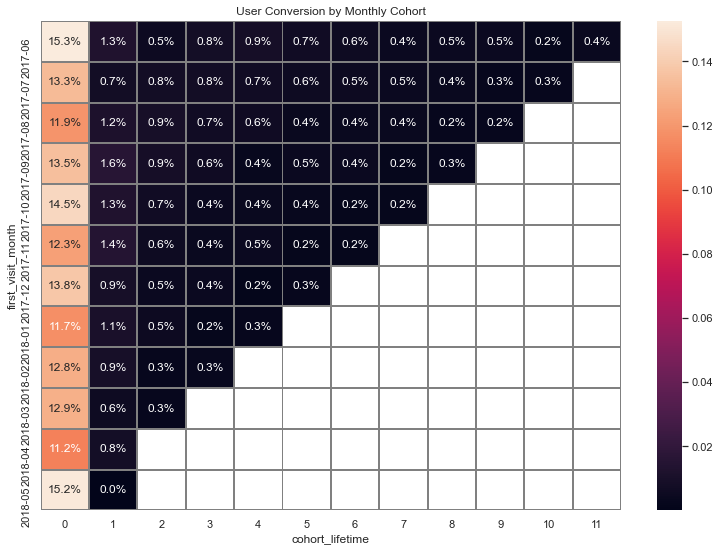

In [37]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('User Conversion by Monthly Cohort')
sns.heatmap(conversion_pivot, annot=True, fmt='.1%',
            yticklabels = conversion_pivot.index.to_series().dt.strftime('%Y-%m'),
            linewidths='1', linecolor='gray')
plt.show()

In [41]:
#finding orders users placed each month
costs['month']=costs['dt'].astype('datetime64[M]')
orders['order_month']= orders['Buy Ts'].astype('datetime64[M]')
first_orders = orders.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']
first_orders.head()

,Uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [42]:
# monthly cohorts
monthly_orders = visits_orders.groupby(['first_order_month', 'order_month']).agg({'Uid':'nunique'})
monthly_orders_by_cohorts = monthly_orders.pivot_table(index='first_order_month', columns='order_month', values='Uid', aggfunc='sum')
display(monthly_orders_by_cohorts)

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2023.0,61.0,50.0,54.0,88.0,67.0,62.0,47.0,58.0,45.0,45.0,53.0,NaN
2017-07-01,NaN,1923.0,52.0,57.0,64.0,49.0,38.0,36.0,39.0,42.0,22.0,26.0,NaN
2017-08-01,NaN,NaN,1370.0,58.0,53.0,44.0,40.0,32.0,30.0,44.0,19.0,31.0,NaN
2017-09-01,NaN,NaN,NaN,2581.0,130.0,100.0,74.0,52.0,64.0,66.0,37.0,43.0,NaN
2017-10-01,NaN,NaN,NaN,NaN,4340.0,206.0,123.0,92.0,93.0,72.0,56.0,67.0,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,4081.0,222.0,120.0,106.0,81.0,48.0,62.0,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4383.0,146.0,103.0,97.0,50.0,63.0,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3373.0,114.0,83.0,43.0,45.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3651.0,118.0,58.0,39.0,NaN


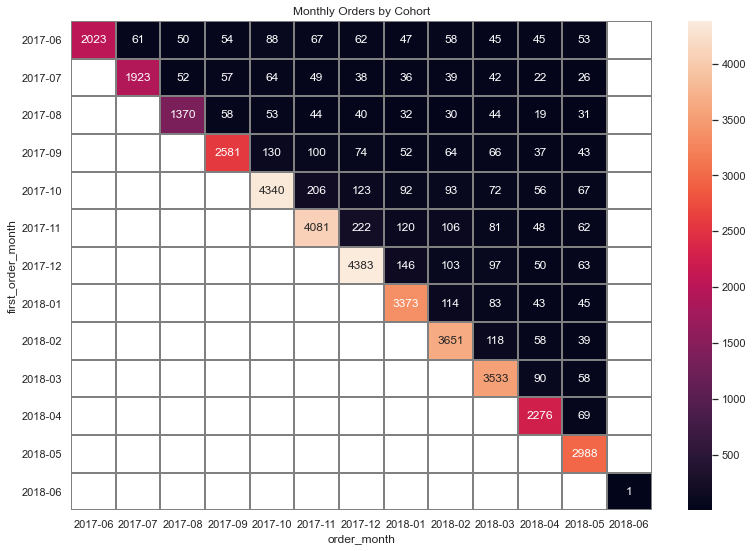

In [43]:
# print('How many orders do they make during a given period of time?')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Monthly Orders by Cohort')
sns.heatmap(monthly_orders_by_cohorts, annot=True, 
            xticklabels = monthly_orders_by_cohorts.columns.to_series().dt.strftime('%Y-%m'),
            yticklabels = monthly_orders_by_cohorts.index.to_series().dt.strftime('%Y-%m'),
            fmt='g', linewidths='1', linecolor='gray')
plt.show()

#### Conclusion
as time goes on the amount of purchases decreased, then they ramp up back around the holidays. June 2017 reveales that the cohort jumped up higher than the second month. New users and first purchases ramped up it looks like during the holiday season on through March 2018. This could be due to the marketing campaigns 

In [47]:
cohort_sizes=first_orders.groupby('first_order_month').agg({'Uid':'nunique'}).reset_index()
cohort_sizes.columns = ['cohort_month', 'n_buyers']
cohort_sizes.head()

,cohort_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [48]:
#new buyers
orders_ = pd.merge(orders,first_orders, on='Uid')
orders_.head().sort_values(by=['Revenue'], ascending=False)

,Buy Ts,Revenue,Uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [49]:
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [50]:
print('How many orders do they make during a given period of time?')
first_purchase_dates = orders_.groupby('Uid')['Buy Ts'].min()
first_purchase_dates.name = 'first_purchase_datetime'
orders = orders_.merge(first_purchase_dates,on='Uid')
orders['purchase_month'] = orders['Buy Ts'].astype('datetime64[M]')
orders['first_purchase_month'] = orders['first_purchase_datetime'].astype('datetime64[M]')
orders_pivot = orders.pivot_table(index='first_purchase_month',columns='purchase_month',values='Revenue',aggfunc='sum')
display(orders_pivot)

How many orders do they make during a given period of time?


purchase_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_purchase_month,,,,,,,,,,,,,
2017-06-01,9557.49,981.82,885.34,1931.30,2068.58,1487.92,1922.74,1176.56,1119.15,1225.51,1155.66,519.62,NaN
2017-07-01,NaN,11557.65,644.61,1199.05,690.31,339.97,300.08,231.16,272.72,310.05,282.96,299.36,NaN
2017-08-01,NaN,NaN,7228.83,646.63,628.12,536.05,676.85,388.45,288.61,554.86,400.33,257.53,NaN
2017-09-01,NaN,NaN,NaN,14568.53,2884.49,1344.52,10261.52,1033.84,1670.08,1810.85,627.57,474.92,NaN
2017-10-01,NaN,NaN,NaN,NaN,21716.20,2325.21,830.65,682.01,657.77,522.37,368.10,501.14,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,21036.26,1629.27,814.39,1326.13,604.04,219.88,469.02,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,20767.49,1141.22,4054.70,4669.10,1371.57,1481.66,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13949.50,994.22,1026.34,481.59,211.48,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15177.16,1015.98,286.66,270.70,NaN


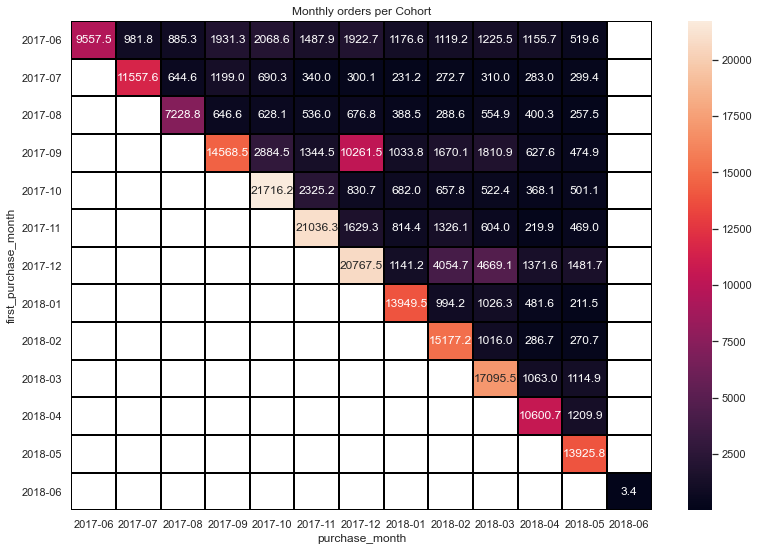

In [51]:
# printing average revenue per cohort, per month
plt.figure(figsize=(13, 9))
plt.title('Monthly orders per Cohort')
sns.heatmap(orders_pivot, annot=True, fmt='.1f', xticklabels = monthly_orders_by_cohorts.columns.to_series().dt.strftime('%Y-%m'), yticklabels = monthly_orders_by_cohorts.index.to_series().dt.strftime('%Y-%m'), linewidths=1, linecolor='black')
plt.show()

In [52]:
#average purchase size
print('Average purchase size:', orders['Revenue'].mean())

Average purchase size: 4.999646930476922


#### conclusion
average order size is inconsistent throught the year. Second month shows that average size increases but then decreases drastically. The first months average for June 2017 typically spends the most by far with the exeption of the September cohort and the December cohort. 

In [53]:
#(LTV)
cohort_sizes=first_orders.groupby('first_order_month').agg({'Uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head().sort_values(by=['n_buyers'], ascending=False)

,first_order_month,n_buyers
4,2017-10-01,4340
3,2017-09-01,2581
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370


In [54]:
#how much money do they bring(LTV)
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

#how much money do they bring(LTV)
report['gp'] = report['Revenue'] 
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head().sort_values(by=['Revenue'], ascending=False)

,first_order_month,n_buyers,order_month,Revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2


In [55]:
#LTV values
report['ltv']= report['gp'] / report['n_buyers']
output = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean')

display(output)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.950440,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07-01,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.141820,0.161232,0.147145,0.155673,NaN
2017-08-01,5.276518,0.471993,0.458482,0.391277,0.494051,0.283540,0.210664,0.405007,0.292212,0.187978,NaN,NaN
2017-09-01,5.644529,1.117586,0.520930,3.975792,0.400558,0.647067,0.701608,0.243150,0.184006,NaN,NaN,NaN
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.151560,0.120362,0.084816,0.115470,NaN,NaN,NaN,NaN
2017-11-01,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,0.260374,0.925097,1.065275,0.312930,0.338047,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,0.294758,0.304281,0.142778,0.062698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,0.278274,0.078515,0.074144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#mean LTV by Age
output.mean(axis=0)

age
0     4.801682
1     0.455547
2     0.405498
3     0.827223
4     0.346141
5     0.333492
6     0.363777
7     0.297408
8     0.297666
9     0.313637
10    0.363467
11    0.256856
dtype: float64

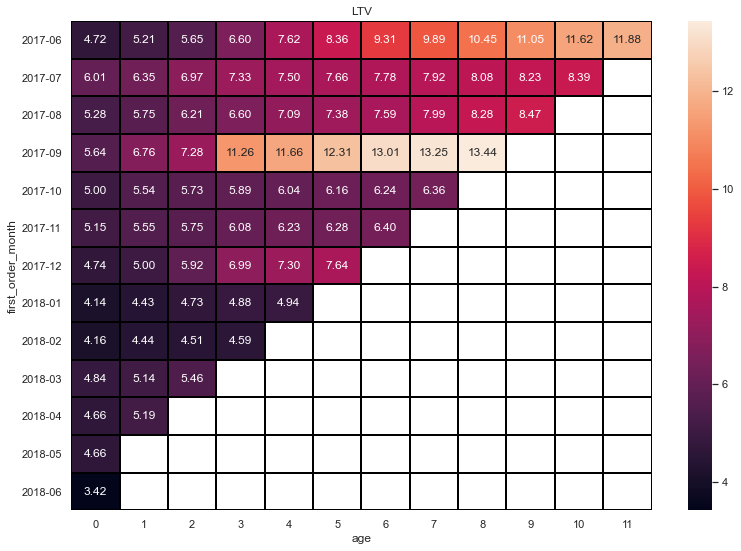

In [57]:
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(output.cumsum(axis=1), annot=True, fmt='.2f', yticklabels = monthly_orders_by_cohorts.columns.to_series().dt.strftime('%Y-%m'), linewidths=1, linecolor='black')
plt.show()

##### conclusion
based on the data it looks like average revenue per use had gone down over time. This excludes the first cohort because like in the rest of the datasets, the first cohort shows higher revenue generated. 

there is an overall downward trend in revenue per user in the first order month. Yandex should find a way to increase revenue by planning marketing tactics that worked at the beginning of the month. This would ensure and increase throught the year. It might be helpful to survey the cohort to get additional information.

#### Marketing
- How much money was spent? Overall/per source/over time
- How much did customer acquisition from each of the sources cost?
- How worthwhile where the investments? (ROI)

In [58]:
#monthly costs from cost dataframe only
print("The amount Yandex spend throught June 2017 through June 2018 was:", costs['costs'].sum())

The amount Yandex spend throught June 2017 through June 2018 was: 329131.62


,source_id,costs
0,3,141321.63
1,4,61073.60
2,5,51757.10
3,2,42806.04
4,1,20833.27
5,10,5822.49
6,9,5517.49


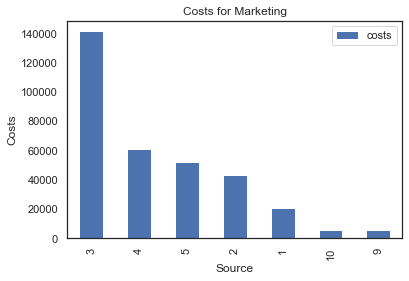

In [59]:
costs_source = costs.groupby('source_id')['costs'].sum()
costs_source = costs_source.sort_values(ascending=False).reset_index()
display(costs_source)

costs_source.plot(x='source_id', kind='bar')
plt.title('Costs for Marketing')
plt.ylabel('Costs', fontsize=12)
plt.xlabel('Source', fontsize=12)
plt.show()

Most of the costs were spent on source 3 advertising campagn

,month,month_costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


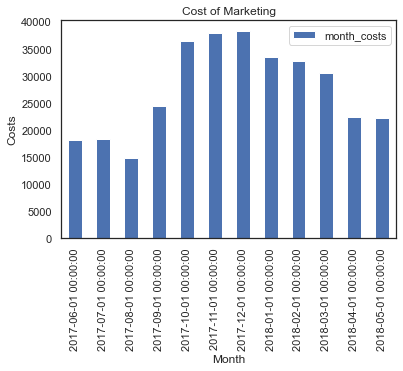

In [60]:
costs['cost_month'] = costs.dt.astype('datetime64[M]')
costs_month = costs.groupby('cost_month')['costs'].sum().reset_index()
costs_month.columns = ['month', 'month_costs']
display(costs_month)

costs_month.plot(x='month', kind='bar')
plt.title('Cost of Marketing')
plt.ylabel('Costs', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()

In [62]:
costs_source_mth = costs.groupby(['cost_month', 'source_id'])['costs'].sum().round().astype('int').reset_index()
display(costs_source_mth.head())

,cost_month,source_id,costs
0,2017-06-01,1,1126
1,2017-06-01,2,2427
2,2017-06-01,3,7732
3,2017-06-01,4,3515
4,2017-06-01,5,2616


#### conclusion
marketing efforts were increased over the course of three months.. with the highest cost of marketing ramping up around the holiday season. This is consistent throught the data where costs were ramped up during September and didnt go down until the end of March 2018.

In [63]:
#aquisition costs (CAC)
visits_orders_sources = visits_orders.groupby('Source Id').agg({'Uid':'nunique', 'Revenue':'sum'}).round().reset_index()
visits_orders_sources.columns = ['source_id', 'n_buyers', 'revenue']

source_orders_costs = pd.merge(visits_orders_sources, costs_source, on='source_id')

source_orders_costs['cac'] = source_orders_costs['costs'] / source_orders_costs['n_buyers']

source_orders_costs.sort_values(by=['cac'], ascending=False)

,source_id,n_buyers,revenue,costs,cac
2,3,13846,296688.0,141321.63,10.206676
1,2,7305,2638189.0,42806.04,5.859828
4,5,10156,1181477.0,51757.10,5.096209
3,4,14253,496690.0,61073.60,4.284965
6,10,1773,14619.0,5822.49,3.283976
0,1,7138,2298200.0,20833.27,2.918642
5,9,2793,36342.0,5517.49,1.975471


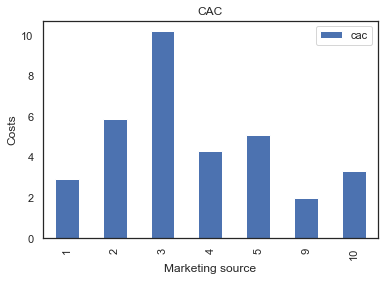

In [64]:
source_orders_costs.plot(kind='bar', x='source_id', y='cac')
plt.title('CAC')
plt.xlabel('Marketing source', fontsize=12)
plt.ylabel('Costs', fontsize=12)
plt.show()

#### conclusion
The most expensive CAC is 10.2 onboarding a large number of customers but the number of customers did nt generate the largest amount of revenue or customers. The marketing campagn that resulted in the highest number of new buyers was source 4. The source that generated the highest amount of revenue was source 2. Wit this information it would be helpful to combine efforts between these two campaigns.

In [65]:
#ROMI calc
margin_rate = 1

source_orders_costs['gp']= source_orders_costs ['revenue'] * margin_rate
source_orders_costs['ltv'] = source_orders_costs['gp'] / source_orders_costs['n_buyers']
source_orders_costs['romi'] = source_orders_costs['ltv'] / source_orders_costs['cac']

output_romi = source_orders_costs.pivot_table(index='source_id', values='romi', aggfunc='sum')
display(output_romi.sort_values(by='romi', ascending=False))
output_romi.mean(axis=0)

,romi
source_id,
1,110.313935
2,61.631232
5,22.827342
4,8.132647
9,6.586691
10,2.510781
3,2.099381


romi    30.586001
dtype: float64

In [66]:
# rebuilding cohorts to include marketing cost per month
month_cost = costs.groupby('cost_month').agg({'costs':'sum'})
display(month_cost.head())

full_report = report.merge(month_cost, left_on='first_order_month', right_on='cost_month')
display(full_report.head())

,costs
cost_month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88


,first_order_month,n_buyers,order_month,Revenue,gp,age,ltv,costs
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,18015.0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,18015.0
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,18015.0
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,18015.0
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,18015.0


In [67]:
# calculating cac and romi per month
full_report['cac'] = full_report['costs'] / full_report['n_buyers']
full_report['romi'] = full_report['ltv'] / full_report['cac']
display(full_report.head())

,first_order_month,n_buyers,order_month,Revenue,gp,age,ltv,costs,cac,romi
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,18015.0,8.905091,0.530530
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,18015.0,8.905091,0.054500
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,18015.0,8.905091,0.049145
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,18015.0,8.905091,0.107205
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,18015.0,8.905091,0.114825


In [68]:
full_report_pivot = full_report.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
full_report_pivot.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


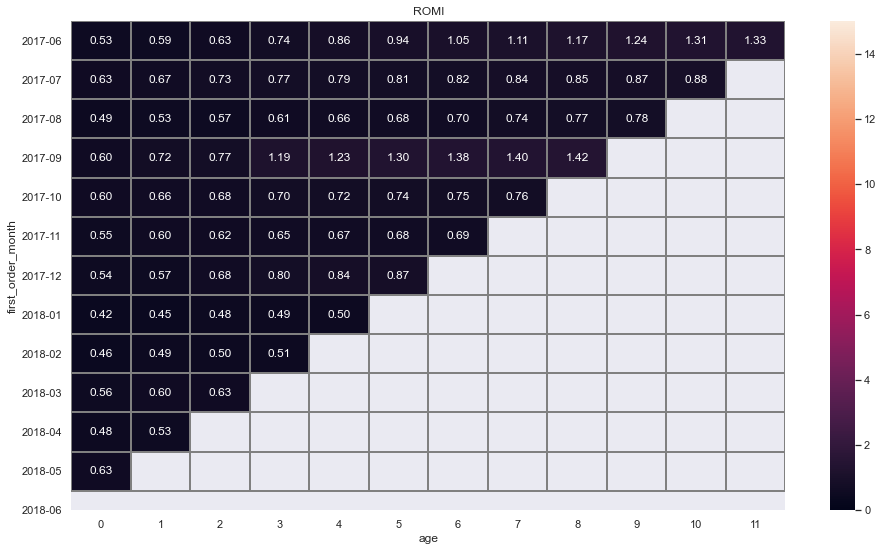

In [69]:
sns.set(style='dark')
plt.figure(figsize=(16,9))
plt.title('ROMI')
sns.heatmap(full_report_pivot.cumsum(axis=1), annot=True, fmt='.2f',yticklabels = monthly_orders_by_cohorts.columns.to_series().dt.strftime('%Y-%m'), linewidth= 1, linecolor='gray', vmax= 15, vmin=0)

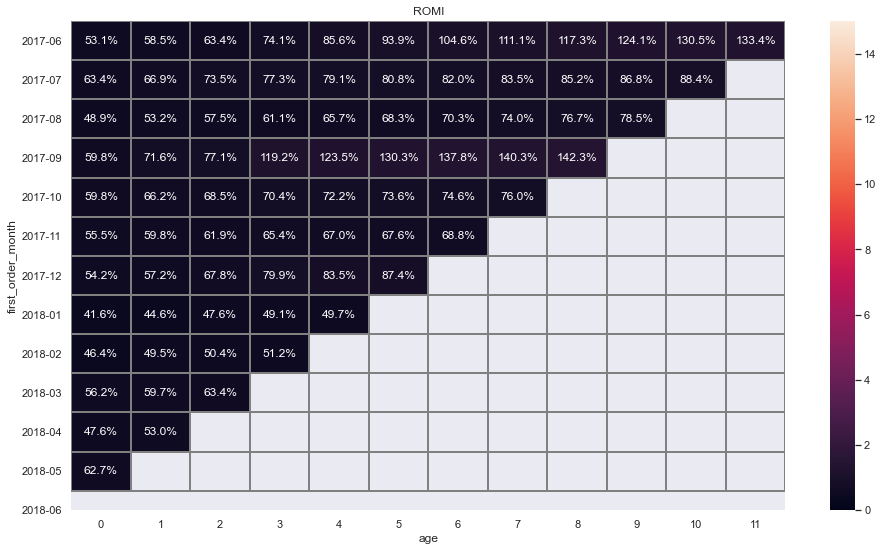

In [70]:
#heatmap formatted with percentage
sns.set(style='dark')
plt.figure(figsize=(16,9))
plt.title('ROMI')
sns.heatmap(full_report_pivot.cumsum(axis=1), annot=True, fmt='.1%',yticklabels = monthly_orders_by_cohorts.columns.to_series().dt.strftime('%Y-%m'), linewidth= 1, linecolor='gray', vmax= 15, vmin=0)

In [71]:
full_report.mean(axis=0)

n_buyers     2840.397436
Revenue      3231.458718
gp           3231.458718
age             3.666667
ltv             1.120532
costs       25979.691538
cac             9.319905
romi            0.122403
dtype: float64

In [72]:
full_report_pivot.cumsum(axis=1).mean(axis=1)

first_order_month
2017-06-01    0.957963
2017-07-01    0.788036
2017-08-01    0.654241
2017-09-01    1.113375
2017-10-01    0.701471
2017-11-01    0.637360
2017-12-01    0.716692
2018-01-01    0.465283
2018-02-01    0.493541
2018-03-01    0.597588
2018-04-01    0.502735
2018-05-01    0.626601
dtype: float64

#### Conclusion
The average ROMI was 115% based on the average LTV of 1.12/CAC of 11
- In June we start ahead going well over the ROMI all year
- July, september, november and march are all over the ROMI showing profits
- overall it looks like there are consistent pay offs throught the course of the year until February, which drops down but raises back up due to the marketing cohort released in March.


#### Conclusion
We can definitely see some interesting facts here. We see that although we had increases in traffic from September 2017 through March 2018. These increases in traffic resulted in more purchases during these months as well where we saw income grow faster in September through March. We also saw expenses increase during these months due to these increases. Although marketing campaign 3 showed a reduction in investment, there was more revenue in campaign 4 and 5. Using these ad campaigns for marketing efforts done from September through March could yield more profit.  Based on this data we also see that it takes between 5-6 months for payoff to occur but given that the profits were significant, it seems that the business seems healthy based on the lifettime values. It would be wise for the marketing department to coordinate efforts during the back to school and holiday season so that purchases are made during the peaks in business to ensure that the organization remains successful. 